# Load and initialize

settings

In [1]:
# sample number
# j=str(1245)
# n_samples = 10000
    # create visualization
# visualize = True
#     # show figures
show = False

# load_from_file = False
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
dir_data = parent_dir+'/Data/'
# dir_data = parent_dir+'/Data_sampNormScale/'
# dir_data = parent_dir+'/Data_sampScale/'

envirement

In [2]:
import os

import time 
start = time.process_time()
import pathlib
import sys
from IPython.display import Image, display
from tqdm import tqdm_notebook,tqdm
# import time

import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

plt.rcParams["figure.figsize"] = (5.0, 4.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"
%matplotlib inline

import pandas as pd
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 180) #according to screen width
# from pandas.core.base import PandasObject
# PandasObject.view = view #allows view meth pd.view

# from scipy import signal, stats
# import seaborn as sns

# from sklearn import metrics

# from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
# from sklearn.metrics import silhouette_samples,silhouette_score
# from sklearn.neighbors import kneighbors_graph

# from lmfit import minimize, Parameters


sys.path.append(parent_dir+'/functions/')
sys.path.append(parent_dir+'/epinuc/')

from usefull_functions import *
from functions import *
from plot_functions import *
from clustering_functions import *
from epinuc import *



%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%autoreload 2


dir_plots = parent_dir+'/plots_epinuc/'
saveSVG  =False
settings =        (dir_plots,show,saveSVG)
folderExists(dir_plots)

TF_ENABLE_ONEDNN_OPTS=0
from plot_functions import *
from usefull_functions import *
from preprocess_functions import *
from functions import *

# load epinuc

In [3]:
    
kEpinuc =  loadEpinucData("EPINUC_BCK.csv",sampleMax=5)
# tuple of raw data; 1- Xi,2- Xi/Xj,3- Xi+Xj
EpinucData =  CreateRawMats(kEpinuc)

# create set  with all features normalized

In [4]:

# prenorm; load data+create the new epinuc features
k = {};names = {}
for j in ["1","2","4","5"]:
    # add epinuc fetures into toNorm
    names[j] = pickle_load('k'+j+'_names_dict',dir_data )
    names[j]['ToNorm']+='H3K9ac/H3K4me1', 'H3K4me3/H3K27me3', 'H3K36me3/H3K9me3', 'H3K4me1+H3K9ac', 'H3K27me3+H3K4me3', 'H3K9me3+H3K36me3'
    names[j]['NamesAll']+='H3K9ac/H3K4me1', 'H3K4me3/H3K27me3', 'H3K36me3/H3K9me3', 'H3K4me1+H3K9ac', 'H3K27me3+H3K4me3', 'H3K9me3+H3K36me3'
    # load data prenorm_dict
    K = pickle_load('k'+j+'_prenorm_dict',dir_data )['k']
    #      # creat epinuc features
    K,neededFeatures = epinucFeaturesInCytof(K)
    # print(K[neededFeatures].describe())
    k[j] = K
    print(len(k[j]))
# load names

# dict = pickle_load('k'+j+'_names_dict',dir_data )
# NamesAll = dict['NamesAll']
# CellIden = dict['CellIden']
# EpiCols = dict['EpiCols']
# Core = dict['Core']

k1_names_dict ; loaded from file
k1_prenorm_dict ; loaded from file
1771
k2_names_dict ; loaded from file
k2_prenorm_dict ; loaded from file
39256
k4_names_dict ; loaded from file
k4_prenorm_dict ; loaded from file
366648
k5_names_dict ; loaded from file
k5_prenorm_dict ; loaded from file
63390


In [5]:
for i,K in k.items():
    print('')
    print(f'sample {i} zero value percentage')
    for f in ['H3K27me3','H3K9me3','H3K4me1']:
        print(f'{f}: {len(K[K[f]==0])/len(K)*100}')


sample 1 zero value percentage
H3K27me3: 24.957651044607566
H3K9me3: 6.549971767363072
H3K4me1: 0.7905138339920948

sample 2 zero value percentage
H3K27me3: 32.49439576115753
H3K9me3: 9.259730996535561
H3K4me1: 11.040350519665784

sample 4 zero value percentage
H3K27me3: 14.080807750212736
H3K9me3: 3.9359276472256766
H3K4me1: 1.797636970609413

sample 5 zero value percentage
H3K27me3: 8.108534469159173
H3K9me3: 1.2935794289320082
H3K4me1: 0.08518693800283957


In [6]:
def normalize_data(k,sample,names):
    for j, K in k.items():
        
        
        # FIRST STEP - normalize_gardient by core 
        # SECOND STEP - normalize ToNorm fetures by the core features ['H3.3','H4']
        
        if j=='1' or j=='2':
          K=NormalizeNew2(K,names[j]['ToNorm'])
          K = Mean_Core_normalization(K, names[j]['ToNorm'],coreFetures=['H3.3','H4'])
          
        elif j=='4' or  j=='5':
          K=NormalizeNew(K,names[j]['ToNorm'])
          K = Mean_Core_normalization(K, names[j]['ToNorm'],coreFetures=['H4','H3', 'H3.3'])
        else: 
          print ('error')
          break
        
        k[j] = K 
        # print (sample + j,f'; normalized with method {j}')
    return k

k = normalize_data(k,'k',names)
old_k= k.copy()
k={}

In [7]:
uncommonFeatures = ['NCad','ECad','panKeratin',  'p53', 'ZEB1' ]


# remove from the  mutual list uncommonFeatures
N = names['1'].copy()

for j, sublist in N.items():
    for f in uncommonFeatures:
        try:
            sublist.remove(f)
        except:
            pass
    N[j] = sublist
names['1245'] = N

# names['figures'].append(2)


 # remove from data
appendDict ={}
for i, KK in old_k.items():
    K=KK.copy()
    for f in uncommonFeatures:
        try:
            K = K.drop(columns=[f])
        except:
            pass
    # print (K.columns)
    appendDict[i ] = K
    
# del k; k=dict 

# append data
NamesAll = names['1245']['NamesAll']
k= pd.DataFrame(columns =NamesAll+['by_sample'])
for i, K in appendDict.items():

    K= subsample_k(K[NamesAll].copy(),n=1771)
    K['by_sample'] = int(i)
    k = k.append(K, ignore_index=True)
by_sampleInd = k['by_sample'].copy()
kFeaturesNorm = k.copy()
k={};K={}

# k['1245']['by_sample'] = by_sampleInd
# k_append['by_sample'] = by_sampleInd
# print(len(by_sampleInd))

 size =  1771
 size =  39256
new size =  1771
 size =  366648
new size =  1771
 size =  63390
new size =  1771


/tmp/ipykernel_7049/2610829581.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k = k.append(K, ignore_index=True)
/tmp/ipykernel_7049/2610829581.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k = k.append(K, ignore_index=True)
/tmp/ipykernel_7049/2610829581.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k = k.append(K, ignore_index=True)
/tmp/ipykernel_7049/2610829581.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  k = k.append(K, ignore_index=True)


epinuc calculations

/home/yishai/breast_cancer/epinuc/epinuc.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rawMat = kEpinuc.append(k)
/home/yishai/breast_cancer/epinuc/epinuc.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rawMat = kEpinuc.append(k)
/home/yishai/breast_cancer/epinuc/epinuc.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rawMat = kEpinuc.append(k)
/home/yishai/breast_cancer/epinuc/epinuc.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rawMat = kEpinuc.append(k)


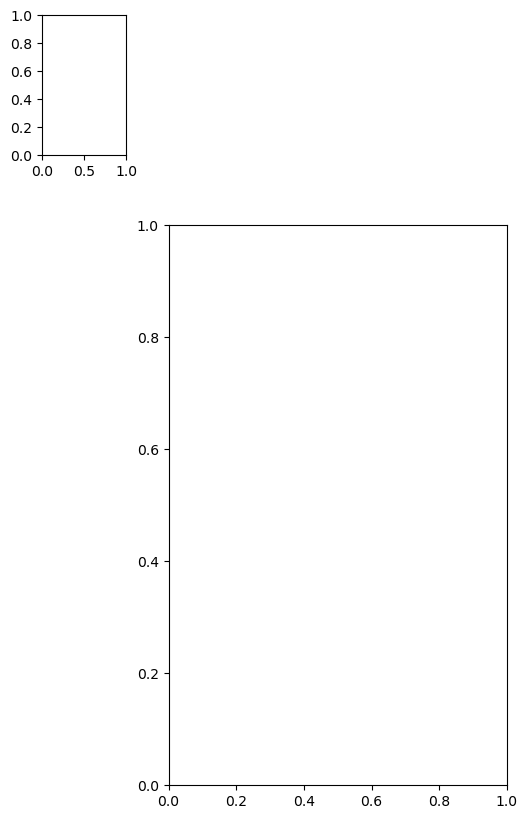

In [8]:
# average over epinuc features after normalizing them
# divide into the 3 mats
kBeforeAverage =  CreateRawMats(kFeaturesNorm.groupby(by='by_sample').mean()[neededFeatures])

# caculate anothr dataset which is the sum of the average rather than the average of the sum
kAfterAverage,_ = epinucFeaturesInCytof(kBeforeAverage[0].copy())
kAfterAverage =  CreateRawMats(kAfterAverage)

# for i,[k,kEpinuc] in enumerate(zip(kBeforeAverage,EpinucData)):
#     try:
#         createCorrMat(k,kEpinuc.copy(),settings,title='computation before averaged',figname = f'{i}_FeturesNormed_compBeforeAvg',method ='spearman')
#     except:
#         pass
# for i,[k,kEpinuc] in enumerate(zip(kAfterAverage,EpinucData)):
#     try:
#         createCorrMat(k,kEpinuc.copy(),settings,title='computation after averaged',figname = f'{i}_FeturesNormed_compAfterAvg',method ='spearman')
#     except:
#         pass


for j,[cytofData,tit,fig] in enumerate(zip([kBeforeAverage,kAfterAverage],
                             ['computation before averaged','computation after averaged'],
                             ['_FeturesNormed_compBeforeAvg','_FeturesNormed_compAfterAvg'])):
    for i,[k,kEpinuc] in enumerate(zip(cytofData,EpinucData)):
        if i>0:
            try:
                createCorrMat(k,kEpinuc.copy(),settings,title=tit,figname = str(i)+fig)
            except:
                pass

# load data after normalization (features aren't normalized)


In [9]:
# kFeaturesWithoutNorm =
kFeaturesWithoutNorm,neededFeatures = epinucFeaturesInCytof(pickle_load('k1245_prescaled_dict',dir_data )['k'])
print (len (kFeaturesWithoutNorm))

k1245_prescaled_dict ; loaded from file
7084


In [11]:
# average over epinuc features after normalizing them
# divide into the 3 mats
kBeforeAverage =  CreateRawMats(kFeaturesWithoutNorm.groupby(by='by_sample').mean()[neededFeatures])

# caculate anothr dataset which is the sum of the average rather than the average of the sum
kAfterAverage,_ = epinucFeaturesInCytof(kBeforeAverage[0].copy())
kAfterAverage =  CreateRawMats(kAfterAverage)
for j,[cytofData,tit,fig] in enumerate(zip([kBeforeAverage,kAfterAverage],
                             ['computation before averaged','computation after averaged'],
                             ['_FeturesWithoutNorm_compBeforeAvg','_FeturesWithoutNorm_compAfterAvg'])):
    for i,[k,kEpinuc] in enumerate(zip(cytofData,EpinucData)):
        if i !=1 or k[k.columns[0]].isna().sum()==0:

            try:
                createCorrMat(k,kEpinuc.copy(),settings,title=tit,figname = str(i)+fig)
            except:
                pass


/home/yishai/breast_cancer/epinuc/epinuc.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rawMat = kEpinuc.append(k)


Visualize data

no point to print data.describe() as it is whitened (std~1, mean~0) 

In [11]:
# if show:

#     for name in [NamesAll,Core,CellIden,EpiCols,CellIden_EpiCols]:
#         print(len(name))
#         print(name)


# Cell Identity

In [ ]:
k = k_orig.copy()
CAll=pd.concat([k]).copy()
s ={}
s['min_dist'] = {}
s['n_neighbors'] = {}
s['min_samples'] = {}
s['eps'] = {}


name = 'Tumor'+j+'_CellIden_'


### UMAP

plot for each feature according to its intensity

In [ ]:
s['min_dist']['245']=0.001
s['n_neighbors']['245']=10
s['min_dist']['1245']=0.01
s['n_neighbors']['1245']=50

min_dist = s['min_dist'][j]
n_neighbors = s['n_neighbors'][j]



umapData = calculate_umap(CAll[CellIden],n_neighbors, min_dist)
if visualize:
  

  drawUMAP(umapData, ['H4'],CAll,settings,
              title = f'min_dist = {min_dist}, n_neighbors = {n_neighbors}',
              Figname = name+'1_UMAP_(core)')

# umap_params(k,CellIden,dir_plots,
#             valA = min_dist, valB = n_neighbors
#             )

# if j=='4':
#     ind  = np.where(umapData[:,0]<5)
#     k_orig.drop(k_orig.index[ind],inplace=True)
#     k = k_orig.copy();CAll=pd.concat([k]).copy()
    
    # umapData = calculate_umap(CAll[CellIden],n_neighbors, min_dist)
    # drawUMAP(umapData, ['H4'],CAll,settings,
    #             title = f'min_dist = {min_dist}, n_neighbors = {n_neighbors}',
    #             Figname = name+'1_UMAP_(core)')
    


### Dbscan and clusters

In [ ]:
s['min_samples']['245']=50
s['eps']['245']=0.19
s['min_samples']['1245']=140
s['eps']['1245']=0.18

eps=s['eps'][j];min_samples=s['min_samples'][j]
dbscanData,labels,core_samples_mask = calculate_dbscan(umapData,eps,min_samples)
if visualize:
  drawDbscan(dbscanData,labels,core_samples_mask,settings,
              title=f'min_samples = {min_samples}, eps = {eps}',
              figname = name+'1_dbscan')
              
  


# dbscan_params(X_2d,
#                   valA = eps, valB = min_samples,
#                   itersA = 3, itersB = 3,
#                   )


In [ ]:

plotClusters(k,umapData,labels,NamesAll,settings,
             title = 'Clusters Tumor '+j+' - Cell Iden Based',
             figname = name+'1_Clusters')
             



### HeatMap by clusters

In [ ]:
### HeatMap by clusters
            
if visualize:
    for group_name,group in zip(groups[0],groups[1]):
        group_name,group = groups[0][-1],groups[1][-1]
        HeatMap(k[k.Clust!=-1],group,settings,
                title = 'T'+j+' Cell Iden Based: '+group_name,
                figname = name+'1_HeatMap_'+group_name)


### HeatMap by sample

In [ ]:
if visualize:
    for group_name,group in zip(groups[0],groups[1]):
        group_name,group = groups[0][-1],groups[1][-1]
        HeatMap(k[k.Clust!=-1],group,settings,clustFeature='by_sample',
                title = 'T'+j+' Cell Iden Based: '+group_name+'by_sample',
                figname = name+'1_HeatMap_'+group_name+'by_sample')


### MeanDist

In [ ]:

if visualize:
    for group_name,group in zip(groups[0],groups[1]):
        MeanDist(k [k.Clust==0],k [k.Clust==1],group,settings,
                title='MeanDist CellIdentity based: '+group_name,
                figname = name+'1_MeanDist_'+group_name)


## sample percentage

In [ ]:
arr =[]
# full map
ind = k.Clust != -1
_ = drawUMAP_intVals(umapData,k,ind, 'by_sample',settings,
        title ='Tumor '+j+' Celliden UMAP', 
        Figname = name+'4_UMAP_(samples)')
# map of each cluster
vals = np.unique(k.Clust); vals = vals[vals!=-1]
for val in vals:
    ind = k.Clust == val
    percentage_arr = drawUMAP_intVals(umapData,k,ind ,'by_sample',settings,
        title ='Tumor '+j+' Celliden UMAP clust' + str(val), 
        Figname = name+'4_UMAP_clust'+str(val)+'_(samples)')
    arr.append([val,percentage_arr])
saveCsv(dir_plots,name,arr)

## features on UMAP

In [ ]:
if visualize:
    drawUMAP(umapData, NamesAll,CAll,settings,
            title ='Tumor'+j+ ' Cell Iden UMAP', 
            Figname = name+'2_UMAP_')

## save data to file

In [ ]:
dbscanData, umapData,k, CAll,labels,s = None,None,None,None,None,None

# Epigenetics Based

In [ ]:


k = k_orig.copy()
CAll=pd.concat([k]).copy()

s ={}
s['min_dist'] = {}
s['n_neighbors'] = {}
s['min_samples'] = {}
s['eps'] = {}

name = 'Tumor'+j+'_EpiCols_'



### UMAP

plot for each feature according to its intensity

In [ ]:
s['min_dist']['245']=0.001
s['n_neighbors']['245']=10
s['min_dist']['1245']=0.001
s['n_neighbors']['1245']=10

min_dist = s['min_dist'][j]
n_neighbors = s['n_neighbors'][j]


umapData = calculate_umap(CAll[EpiCols],n_neighbors, min_dist)
if visualize:
    drawUMAP(umapData, ['H4'],CAll,settings,
              title = f'min_dist = {min_dist}, n_neighbors = {n_neighbors}',
              Figname = name+'1_UMAP_(core)')
    


# umap_params(k,MRK,dir_plots,
#             valA = min_dist, valB = n_neighbors,
#             )

# umap_params(k,MRK,dir_plots,
#             valA = 0.2, valB = 300,
#             )
# umap_params(k,MRK,dir_plots,
#             valA = 0.1, valB = 300,
#             )

# umap_params(k,MRK,dir_plots,
#             valA = 0.001, valB = 300,
#             )

### Dbscan and clusters

In [ ]:
s['min_samples']['245']=50
s['eps']['245']=0.19
s['min_samples']['1245']=100
s['eps']['1245']=0.2
min_samples = s['min_samples'][j]
eps = s['eps'][j]


dbscanData,labels,core_samples_mask = calculate_dbscan(umapData,eps=eps,min_samples=min_samples)
if visualize:
  drawDbscan(dbscanData,labels,core_samples_mask,settings,
              title=f'min_samples = {min_samples}, eps = {eps}',
              figname = name+'1_dbscan')
              
        
        

# dbscan_params(X_2d,dir_plots,
#                   valA = eps, valB = min_samples,
#                   itersA = 3, itersB = 3,
#                   )


  
 

In [ ]:
plotClusters(k,umapData,labels,NamesAll,settings,
             title = 'Clusters Tumor '+j+' - Epigen Based',
             figname = name+'1_Clusters')


## HeatMap by cluster

In [ ]:

if visualize:
    for group_name,group in zip(groups[0],groups[1]):
    
        HeatMap(k[k.Clust!=-1],group,settings,
                title = 'T'+j+' Epigen Based: '+group_name,
                figname = name+'1_HeatMap_'+group_name)


### HeatMap by sample

In [ ]:

if visualize:

    group_name,group = groups[0][-1],groups[1][-1]
    HeatMap(k[k.Clust!=-1],group,settings,clustFeature='by_sample',
            title = 'T'+j+' Cell Iden Based: '+group_name+'by_sample',
            figname = name+'1_HeatMap_'+group_name+'by_sample')


epinuc

In [ ]:
Kepinuc = loadEpinuc("EPINUC_BCK.csv",sampleMax=5)

# group_name,group = groups[0][-1],groups[1][-1]
# HeatMap(k,group,settings,clustFeature='by_sample',
#         title = 'T'+j+' Cell Iden Based: '+group_name+'by_sample',
#         figname = name+'1_HeatMap_'+group_name+'by_sample')
Mat=   k.groupby(by='by_sample').mean()[Kepinuc.columns]
Mat.index = Mat.index.astype(int).astype(str)+'_cytof'
Kepinuc = Kepinuc.append(Mat)
# print(Kepinuc)
# print(Kepinuc.T.corr())

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
g=sns.clustermap(Kepinuc.T.corr(),cmap=plt.cm.seismic,
                #  vmin=amin,vmax=amax,
                # figsize=(10,20), annot_kws={"size":8}, center=0,
                figsize=(6, 10), annot_kws={"size":8}, center=0,
                annot=True, linewidths=1,linecolor='k',)
g.ax_col_dendrogram.set_title('corr map') 
plt.savefig('corr.png', format="png", bbox_inches="tight", pad_inches=0.2)

## Meandist

In [ ]:
if visualize:
    for group_name,group in zip(groups[0],groups[1]):
        MeanDist(k [k.Clust==0],k [k.Clust==1],group,settings,
                title='MeanDist Epigen based: '+group_name,
                figname = name+'1_MeanDist_'+group_name)


## sample percentage

In [ ]:
arr =[]
# full map
ind = k.Clust != -1
_ = drawUMAP_intVals(umapData,k,ind, 'by_sample',settings,
        title ='Tumor '+j+' Celliden UMAP', 
        Figname = name+'4_UMAP_(samples)')
# map of each cluster
vals = np.unique(k.Clust); vals = vals[vals!=-1]
for val in vals:
    ind = k.Clust == val
    percentage_arr = drawUMAP_intVals(umapData,k,ind ,'by_sample',settings,
        title ='Tumor '+j+' Epi UMAP clust' + str(val), 
        Figname = name+'4_UMAP_clust'+str(val)+'_(samples)')
    arr.append([val,percentage_arr])
saveCsv(dir_plots,name,arr)


## features on UMAP

In [ ]:

if visualize:
    drawUMAP(umapData, NamesAll,CAll,settings,
            title ='Tumor '+j+' Epigen UMAP', 
            Figname = name+'2_UMAP_')
    

## save data to file

In [ ]:
dbscanData, umapData,k, CAll,labels,s = None,None,None,None,None,None

# ALL (Epigenetics + Cell identity Based)

In [ ]:

k = k_orig.copy()
CAll=pd.concat([k]).copy()

s ={}
s['min_dist'] = {}
s['n_neighbors'] = {}
s['min_samples'] = {}
s['eps'] = {}

name = 'Tumor'+j+'_CellIden+EpiCols_'



### UMAP

plot for each feature according to its intensity

In [ ]:
s['min_dist']['245']=0.001
s['n_neighbors']['245']=10
s['min_dist']['1245']=0.001
s['n_neighbors']['1245']=10

min_dist = s['min_dist'][j]
n_neighbors = s['n_neighbors'][j]


umapData = calculate_umap(CAll[CellIden_EpiCols],n_neighbors, min_dist)
if visualize:
    drawUMAP(umapData, ['H4'],CAll,settings,
              title = f'min_dist = {min_dist}, n_neighbors = {n_neighbors}',
              Figname = name+'1_UMAP_(core)')
    


# umap_params(k,MRK,dir_plots,
#             valA = min_dist, valB = n_neighbors,
#             )

# umap_params(k,MRK,dir_plots,
#             valA = 0.2, valB = 300,
#             )
# umap_params(k,MRK,dir_plots,
#             valA = 0.1, valB = 300,
#             )

# umap_params(k,MRK,dir_plots,
#             valA = 0.001, valB = 300,
#             )

### Dbscan and clusters

In [ ]:
s['min_samples']['245']=50
s['eps']['245']=0.19
s['min_samples']['1245']=65
s['eps']['1245']=0.12


min_samples = s['min_samples'][j]
eps = s['eps'][j]
dbscanData,labels,core_samples_mask = calculate_dbscan(umapData,eps=eps,min_samples=min_samples)
if visualize:
  drawDbscan(dbscanData,labels,core_samples_mask,settings,
              title=f'min_samples = {min_samples}, eps = {eps}',
              figname = name+'1_dbscan')
              
# dbscan_params(X_2d,dir_plots,
#                   valA = eps, valB = min_samples,
#                   itersA = 3, itersB = 3,
#                   )
# l = labels==4
# s['min_samples']['1245']=70
# s['eps']['1245']=0.2
# dbscanData_,labels_,core_samples_mask_ = calculate_dbscan(umapData[l],eps=eps,min_samples=min_samples)
# labels[l] = labels_
# drawDbscan(dbscanData,labels,core_samples_mask,settings,
#               title=f'min_samples = {min_samples}, eps = {eps}',
#               figname = name+'1_dbscan')

In [ ]:
plotClusters(k,umapData,labels,NamesAll,settings,
             title = 'Clusters Tumor '+j+' - Epigen +Cell identity Based',
             figname = name+'1_Clusters')


## HeatMap by cluster

In [ ]:

if visualize:
    for group_name,group in zip(groups[0],groups[1]):
    
        HeatMap(k[k.Clust!=-1],group,settings,
                title = 'T'+j+' Epigen+Cell Based: '+group_name,
                figname = name+'1_HeatMap_'+group_name)  


### HeatMap by sample

In [ ]:
if visualize:
    for group_name,group in zip(groups[0],groups[1]):
        group_name,group = groups[0][-1],groups[1][-1]
        HeatMap(k[k.Clust!=-1],group,settings,clustFeature='by_sample',
                title = 'T'+j+' Cell Iden Based: '+group_name+'by_sample',
                figname = name+'1_HeatMap_'+group_name+'by_sample')


## Meandist

In [ ]:

if visualize:
    for group_name,group in zip(groups[0],groups[1]):
        MeanDist(k [k.Clust==0],k [k.Clust==1],group,settings,
                title='MeanDist Epigen+Cell based: '+group_name,
                figname = name+'1_MeanDist_'+group_name)


## sample percentage

In [ ]:
arr =[]
# full map
ind = k.Clust != -1
_ = drawUMAP_intVals(umapData,k,ind, 'by_sample',settings,
        title ='Tumor '+j+' Epi+Celliden UMAP', 
        Figname = name+'4_UMAP_(samples)')
# map of each cluster
vals = np.unique(k.Clust); vals = vals[vals!=-1]
for val in vals:
    ind = k.Clust == val
    percentage_arr = drawUMAP_intVals(umapData,k,ind ,'by_sample',settings,
        title ='Tumor '+j+' Epi+Celliden UMAP clust' + str(val), 
        Figname = name+'4_UMAP_clust'+str(val)+'_(samples)')
    arr.append([val,percentage_arr])
saveCsv(dir_plots, name,arr)



## features on UMAP

In [ ]:

if visualize:
    drawUMAP(umapData, NamesAll,CAll,settings,
            title ='Tumor '+j+' Epigen +Cell identity UMAP', 
            Figname = name+'2_UMAP_')
    

## save data to file

In [ ]:
dbscanData, umapData,k, CAll,labels,s = None,None,None,None,None,None

# copy to single pdf

In [ ]:
dict ={}
dict['k'] = k_orig
pickle_dump('k'+j+'_sample', dict,dir_data)

imList2pdf(dir_plots,j,['CellIden','EpiCols','CellIden+EpiCols'])

end = time.process_time()
print ('total run time =', end-start )

In [ ]:
# imList2pdf(dir_plots,j,['CellIden','EpiCols','CellIden+EpiCols'])